## Section 1 ##

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

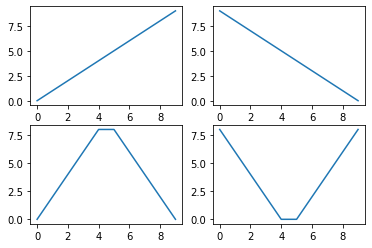

In [2]:
# testing how fig.add_subplot() works
#curves:
l1 = [0,1,2,3,4,5,6,7,8,9]
l2 = [9,8,7,6,5,4,3,2,1,0]
l3 = [0,2,4,6,8,8,6,4,2,0]
l4 = [8,6,4,2,0,0,2,4,6,8]
#ploting:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.plot(l1)
ax2 = fig.add_subplot(2,2,2)
ax2.plot(l2)
ax3 = fig.add_subplot(2,2,3) 
ax3.plot(l3)
ax4 = fig.add_subplot(2,2,4)
ax4.plot(l4)
plt.show

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls

drive  sample_data


In [5]:
%cd drive/MyDrive/Projects/machine_learning_projects/digit_recognition/

/content/drive/MyDrive/Projects/machine_learning_projects/digit_recognition


In [6]:
!ls

np_arrays  testSet  testSet.tar.gz  trainingSet  trainingSet.tar.gz


In [7]:
# unpacking testset
#!tar -xvf 'testSet.tar.gz'

In [8]:
# unpacking trainingset
#!tar -xvf 'trainingSet.tar.gz'

In [9]:
import os
os.getcwd()

'/content/drive/My Drive/Projects/machine_learning_projects/digit_recognition'

In [10]:
os.listdir()

['trainingSet', 'testSet.tar.gz', 'trainingSet.tar.gz', 'testSet', 'np_arrays']

In [11]:
t_path = os.path.join(os.getcwd(),'trainingSet')
print(t_path)

/content/drive/My Drive/Projects/machine_learning_projects/digit_recognition/trainingSet


In [ ]:
t_dict = {}
for digit in os.listdir(t_path):
  print('importing images of ' + digit)
  t_dict[digit] = []
  i = 0
  percentage = 0
  for img_dir in os.listdir(os.path.join(t_path,digit)):
    i = i+1
    img = cv2.imread(os.path.join(t_path,digit,img_dir))
    t_dict[digit].append(img)
    if i > 1000:
      percentage += 25
      i = 0
      print('{}% ................done'.format(percentage))

importing images of 0
25% ................done
50% ................done
75% ................done
100% ................done
importing images of 1
25% ................done
50% ................done
75% ................done
100% ................done
importing images of 2
25% ................done
50% ................done
75% ................done
100% ................done
importing images of 3
25% ................done
50% ................done
75% ................done
100% ................done
importing images of 4
25% ................done
50% ................done
75% ................done
100% ................done
importing images of 5
25% ................done
50% ................done
75% ................done
importing images of 6
25% ................done
50% ................done
75% ................done
100% ................done
importing images of 7
25% ................done
50% ................done
75% ................done
100% ................done
importing images of 8
25% ................

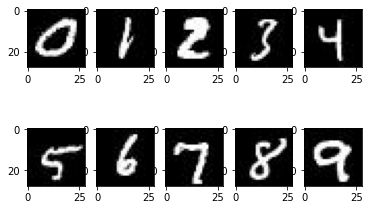

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(2,5,1)
plt.imshow(t_dict['0'][120])
ax = fig.add_subplot(2,5,2)
plt.imshow(t_dict['1'][400])
ax = fig.add_subplot(2,5,3)
plt.imshow(t_dict['2'][700])
ax = fig.add_subplot(2,5,4)
plt.imshow(t_dict['3'][270])
ax = fig.add_subplot(2,5,5)
plt.imshow(t_dict['4'][1500])
ax = fig.add_subplot(2,5,6)
plt.imshow(t_dict['5'][2500])
ax = fig.add_subplot(2,5,7)
plt.imshow(t_dict['6'][3200])
ax = fig.add_subplot(2,5,8)
plt.imshow(t_dict['7'][4000])
ax = fig.add_subplot(2,5,9)
plt.imshow(t_dict['8'][2530])
ax = fig.add_subplot(2,5,10)
plt.imshow(t_dict['9'][120])

In [ ]:
arr = np.array(t_dict['3'])

In [ ]:
arr.shape

(4351, 28, 28, 3)

In [ ]:
classes = list(t_dict.keys())

In [ ]:
os.mkdir('np_arrays')

In [ ]:
!ls

np_arrays  testSet  testSet.tar.gz  trainingSet  trainingSet.tar.gz


In [ ]:
for digit in classes:
  d_array = np.array(t_dict[digit])
  np.save('np_arrays/imgs_{}.npy'.format(digit),d_array)

In [12]:
os.listdir('np_arrays')

['imgs_0.npy',
 'imgs_1.npy',
 'imgs_2.npy',
 'imgs_3.npy',
 'imgs_4.npy',
 'imgs_5.npy',
 'imgs_6.npy',
 'imgs_7.npy',
 'imgs_8.npy',
 'imgs_9.npy']

In [13]:
array1 = np.load('np_arrays/imgs_5.npy')

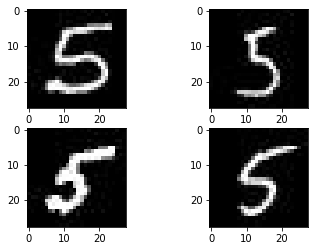

In [14]:
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
plt.imshow(array1[120])
ax = fig.add_subplot(2,2,2)
plt.imshow(array1[670])
ax = fig.add_subplot(2,2,3)
plt.imshow(array1[1345])
ax = fig.add_subplot(2,2,4)
plt.imshow(array1[2670])

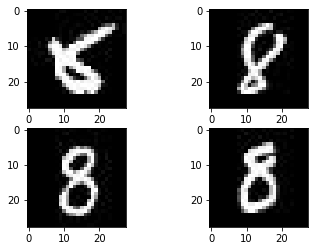

In [16]:
array2 = np.load('np_arrays/imgs_8.npy')
fig = plt.figure()
ax = fig.add_subplot(2,2,1)
plt.imshow(array2[120])
ax = fig.add_subplot(2,2,2)
plt.imshow(array2[670])
ax = fig.add_subplot(2,2,3)
plt.imshow(array2[1345])
ax = fig.add_subplot(2,2,4)
plt.imshow(array2[2670])

In [ ]:
# the arrays have been saved properly

## Section 2 ##
preparing data

In [14]:
import os
print(os.getcwd())
print('')
print(os.listdir())
print('')
print(os.listdir(os.path.join(os.getcwd(),'np_arrays')))

e:\Projects\ai _ml projects\Digit_Recognition

['.git', 'application.py', 'digit_recognition_code.ipynb', 'np_arrays', 'README.md']

['imgs_0.npy', 'imgs_1.npy', 'imgs_2.npy', 'imgs_3.npy', 'imgs_4.npy', 'imgs_5.npy', 'imgs_6.npy', 'imgs_7.npy', 'imgs_8.npy', 'imgs_9.npy']


In [15]:
import numpy as np
data_list = []
for file in os.listdir(os.path.join(os.getcwd(),'np_arrays')):
    data = np.load(os.path.join(os.getcwd(),'np_arrays',file))
    data_list.append(data)


In [16]:
total_list = []
class_array = np.zeros((10,1))
for i in range(10):
    class_array = np.zeros((10,1))
    class_array[i] = 1
    array_img = data_list[i]
    for image in array_img:
        xy_array = np.array([image,class_array])
        total_list.append(xy_array)

In [17]:
len(total_list)

42000

In [18]:
# shuffling the list data for to have a even distribution
from random import shuffle
shuffle(total_list)


In [19]:
data = np.array(total_list)

In [20]:
data.shape

(42000, 2)

In [24]:
np.save('np_arrays/data.npy',data)

## Section 3 ##
data loading

In [3]:
# importing data
import numpy as np
data = np.load('np_arrays/data.npy',allow_pickle= True)
train_x = data[:,0]
train_y = data[:,1]

In [4]:
print(train_x.shape)
print(train_y.shape)

(42000,)
(42000,)


In [5]:
x_list = []
for x in train_x:
    x_list.append(x)
train_x = np.array(x_list) 

y_list = []
for y in train_y:
    y_list.append(y)
train_y = np.array(y_list) 

In [6]:
print(train_x.shape)
train_y = train_y.reshape((42000,10))
print(train_y.shape)

(42000, 28, 28, 3)
(42000, 10)


## Section 4 ##
CNN model creation: AlexNet

In [7]:
import tensorflow as tf

### LeNet Architecture ###
1.input  
2.conv1 (6 filters, 5x5 kernel, padding- 'same')  
3.maxpooling1 (2x2 kernel, 2 stride)  
4.conv2 (16 filters, 5x5 kernel, padding- 'valid')  
5.maxpooling2 (2x2 kernel, 2 stride)  
6.fullyconnectedlayer1 (120 neurons)  
7.fullyconnectedlayer1 (84 neurons)  
8.fullyconnectedlayer1 (10 neurons)  
9.output

In [12]:
# creating a cnn model 
model = tf.keras.Sequential([tf.keras.Input(shape = (28,28,3)),
tf.keras.layers.Conv2D(6, 5, padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2)),
tf.keras.layers.Conv2D(16, 5, padding = 'valid', activation = 'relu'),
tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(120, activation = 'relu'),
tf.keras.layers.Dense(84,activation = 'relu'),
tf.keras.layers.Dense(10,activation = 'softmax')])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [14]:
# compiling the model
model.compile(
    loss= tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.001),
    metrics = ['accuracy']
)

In [15]:
# training the model 
model.fit(train_x,train_y, epochs= 9)

Epoch 1/9
1313/1313 [==============================] - 31s 24ms/step - loss: 0.5736 - accuracy: 0.9021
Epoch 2/9
1313/1313 [==============================] - 31s 24ms/step - loss: 0.1017 - accuracy: 0.9693
Epoch 3/9
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0735 - accuracy: 0.9775
Epoch 4/9
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0696 - accuracy: 0.9792
Epoch 5/9
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0599 - accuracy: 0.9818
Epoch 6/9
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0525 - accuracy: 0.9841
Epoch 7/9
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0472 - accuracy: 0.9870
Epoch 8/9
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0472 - accuracy: 0.9866
Epoch 9/9
1313/1313 [==============================] - 31s 24ms/step - loss: 0.0356 - accuracy: 0.9892


In [32]:
#the accuracy of the model is 98.92% on the training set 

In [17]:
model.save('models/LeNet1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/LeNet1\assets


## Section 5 ##
predicting class of test images

In [39]:
# preparing test images
import os
import cv2
import numpy as np
test_data = []
print('extracting images from {}'.format(os.path.join(os.getcwd(),'testSet')))
i = 0
for image_file in os.listdir(os.path.join(os.getcwd(),'testSet')):
    i = i + 1
    img = cv2.imread(os.path.join(os.getcwd(),'testSet',image_file))
    test_data.append(img)
    if i%1000 == 0:
        print('imported {} images ......'.format(i))
test_data = np.array(test_data)

extracting images from e:\Projects\ai _ml projects\Digit_Recognition\testSet
downloaded 1000 images ......
downloaded 2000 images ......
downloaded 3000 images ......
downloaded 4000 images ......
downloaded 5000 images ......
downloaded 6000 images ......
downloaded 7000 images ......
downloaded 8000 images ......
downloaded 9000 images ......
downloaded 10000 images ......
downloaded 11000 images ......
downloaded 12000 images ......
downloaded 13000 images ......
downloaded 14000 images ......
downloaded 15000 images ......
downloaded 16000 images ......
downloaded 17000 images ......
downloaded 18000 images ......
downloaded 19000 images ......
downloaded 20000 images ......
downloaded 21000 images ......
downloaded 22000 images ......
downloaded 23000 images ......
downloaded 24000 images ......
downloaded 25000 images ......
downloaded 26000 images ......
downloaded 27000 images ......
downloaded 28000 images ......


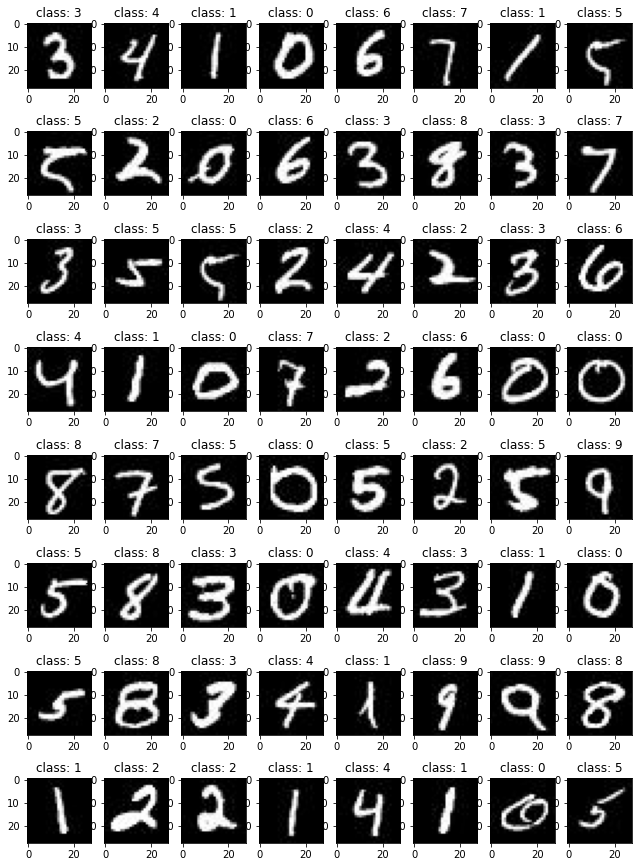

In [70]:
import matplotlib.pyplot as plt
rand_index = np.random.randint(0,28000,(64))
fig = plt.figure()
i = 0
for index in rand_index:
    i = i + 1
    output = model.predict(test_data[index].reshape((1,28,28,3)))
    num_value = np.argmax(output)
    alt = fig.add_subplot(8,8,i)
    alt.set_title('class: {}'.format(num_value))
    alt.imshow(test_data[index])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=3, 
                    wspace=0.2, 
                    hspace=0.35)

## Section 6 ##
increasing the accuracy of the model  
ways:  
1. batch normaliztion

In [100]:
import tensorflow as tf
model2 = tf.keras.Sequential(
    [
        tf.keras.Input(shape= (28,28,3)),
        tf.keras.layers.Conv2D(6, 5, padding = 'same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2)),
        tf.keras.layers.Conv2D(16, 5, padding = 'valid'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.MaxPool2D(pool_size = (2,2), strides = (2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dense(84),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dense(10,activation = 'softmax')
    ]
)
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
batch_normalization_25 (Batc (None, 28, 28, 6)         24        
_________________________________________________________________
re_lu_20 (ReLU)              (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_26 (Batc (None, 10, 10, 16)        64        
_________________________________________________________________
re_lu_21 (ReLU)              (None, 10, 10, 16)       

In [101]:
model2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr = 0.01),
    metrics = ['accuracy']
)

In [102]:
model2.fit(train_x,train_y, batch_size=6000, epochs= 9,)

Epoch 1/9
7/7 [==============================] - 25s 4s/step - loss: 0.8662 - accuracy: 0.7491
Epoch 2/9
7/7 [==============================] - 22s 3s/step - loss: 0.1905 - accuracy: 0.9488
Epoch 3/9
7/7 [==============================] - 23s 3s/step - loss: 0.1114 - accuracy: 0.9673
Epoch 4/9
7/7 [==============================] - 24s 3s/step - loss: 0.0782 - accuracy: 0.9766
Epoch 5/9
7/7 [==============================] - 23s 3s/step - loss: 0.0600 - accuracy: 0.9822
Epoch 6/9
7/7 [==============================] - 23s 3s/step - loss: 0.0475 - accuracy: 0.9860
Epoch 7/9
7/7 [==============================] - 23s 3s/step - loss: 0.0391 - accuracy: 0.9885
Epoch 8/9
7/7 [==============================] - 23s 3s/step - loss: 0.0322 - accuracy: 0.9908
Epoch 9/9
7/7 [==============================] - 24s 3s/step - loss: 0.0266 - accuracy: 0.9929


In [97]:
# batchnormalization layers were added after conv layers and dense layers and the learning rate was increased to 0.01 from 0.001 and the batch size was set to 6000. 
# the accuracy of the model increased from from 98.92% to 99.29%


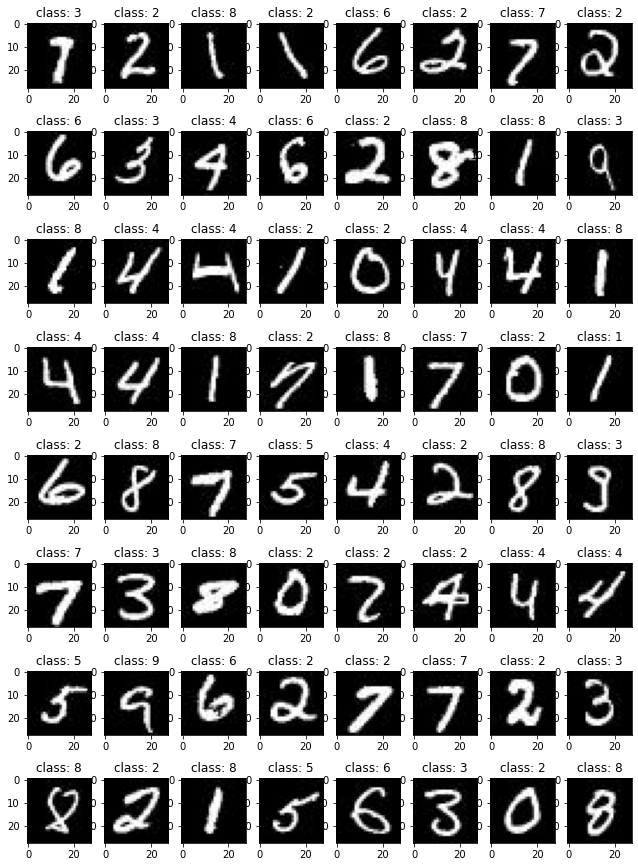

In [103]:
# test model2 on 64 random test images
import matplotlib.pyplot as plt
rand_index = np.random.randint(0,28000,(64))
fig = plt.figure()
i = 0
for index in rand_index:
    i = i + 1
    output = model2.predict(test_data[index].reshape((1,28,28,3)))
    num_value = np.argmax(output)
    alt = fig.add_subplot(8,8,i)
    alt.set_title('class: {}'.format(num_value))
    alt.imshow(test_data[index])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=3, 
                    wspace=0.2, 
                    hspace=0.35)

In [107]:
model2.evaluate(train_x,train_y,batch_size=6000)

7/7 [==============================] - 6s 814ms/step - loss: 1.0170 - accuracy: 0.7728


[1.0170267820358276, 0.7727857232093811]

In [ ]:
# the accuracy of the model on the training set is increased but the new model performed much worst on the test set

In [ ]:
# the accuracy indicated in training is the not the actual accuracy but accuracy calculated by eval method is the correct one which is 77.28% for the second model